In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use("default")


In [11]:

average_indices_planted = pd.read_csv("../../kornmo-data-files/raw-data/crop-classification-data/average_vegetation_indices_planted_fixed.csv")
average_indices_planted.drop("Unnamed: 0", inplace=True, axis=1)

vegetation_indices = ["NDVI", "NDRE", "EVI", "SIPI3", "PVR", "GARI", "GRNDVI", "SIWSI", "LSWI", "NDSVI"]

crop_types = average_indices_planted['planted'].unique()

columns = ["index", "planted"]
for day in range(1, 31):
    columns.append(f"day_{day}")

final_dataset = pd.DataFrame(columns=columns)


for crop_type in crop_types:
    average_indices_for_crop = average_indices_planted[(average_indices_planted['planted'] == crop_type)]
    print(f"{crop_type}: {len(average_indices_for_crop)}")

    for vegetation_index in vegetation_indices:
        default_data = {'index': str(vegetation_index), 'planted': str(crop_type)}
        row = pd.Series(data=default_data, index=['index', 'planted'])

        for day in range(1, 31):
            temp_values = average_indices_for_crop[f"{vegetation_index}_{day}"].tolist()
            all_average_index = []

            for value in temp_values:
                if 0 <= value <= 1:
                    all_average_index.append(value)

            single_average_index = sum(all_average_index) / len(all_average_index)

            if single_average_index < 0 or single_average_index > 1:
                print(f"Min: {min(all_average_index)}, Max: {max(all_average_index)}, Average: {single_average_index}")

            row[f"day_{day}"] = single_average_index

        final_dataset = pd.concat([final_dataset, row.to_frame().T])




bygg: 5698
hvete: 1429
havre: 2429
rug: 70
rughvete: 40
oljefro: 16
erter: 3


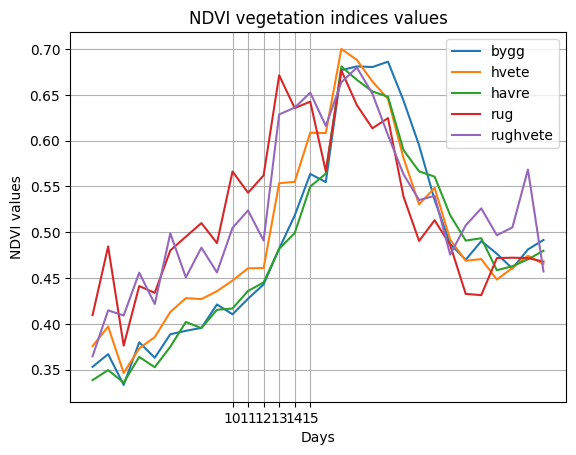

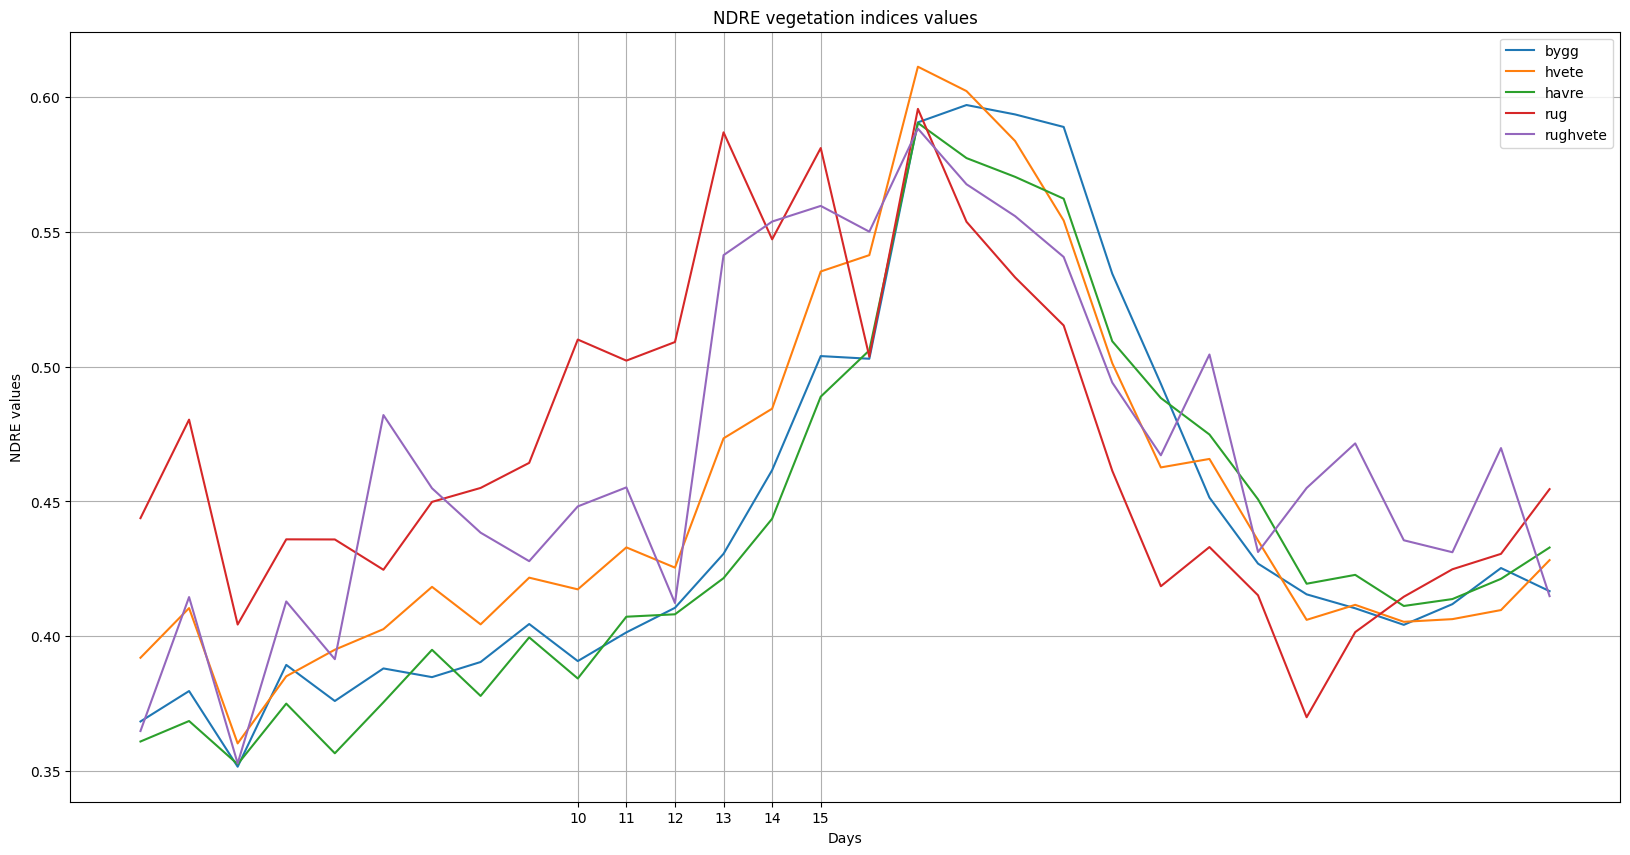

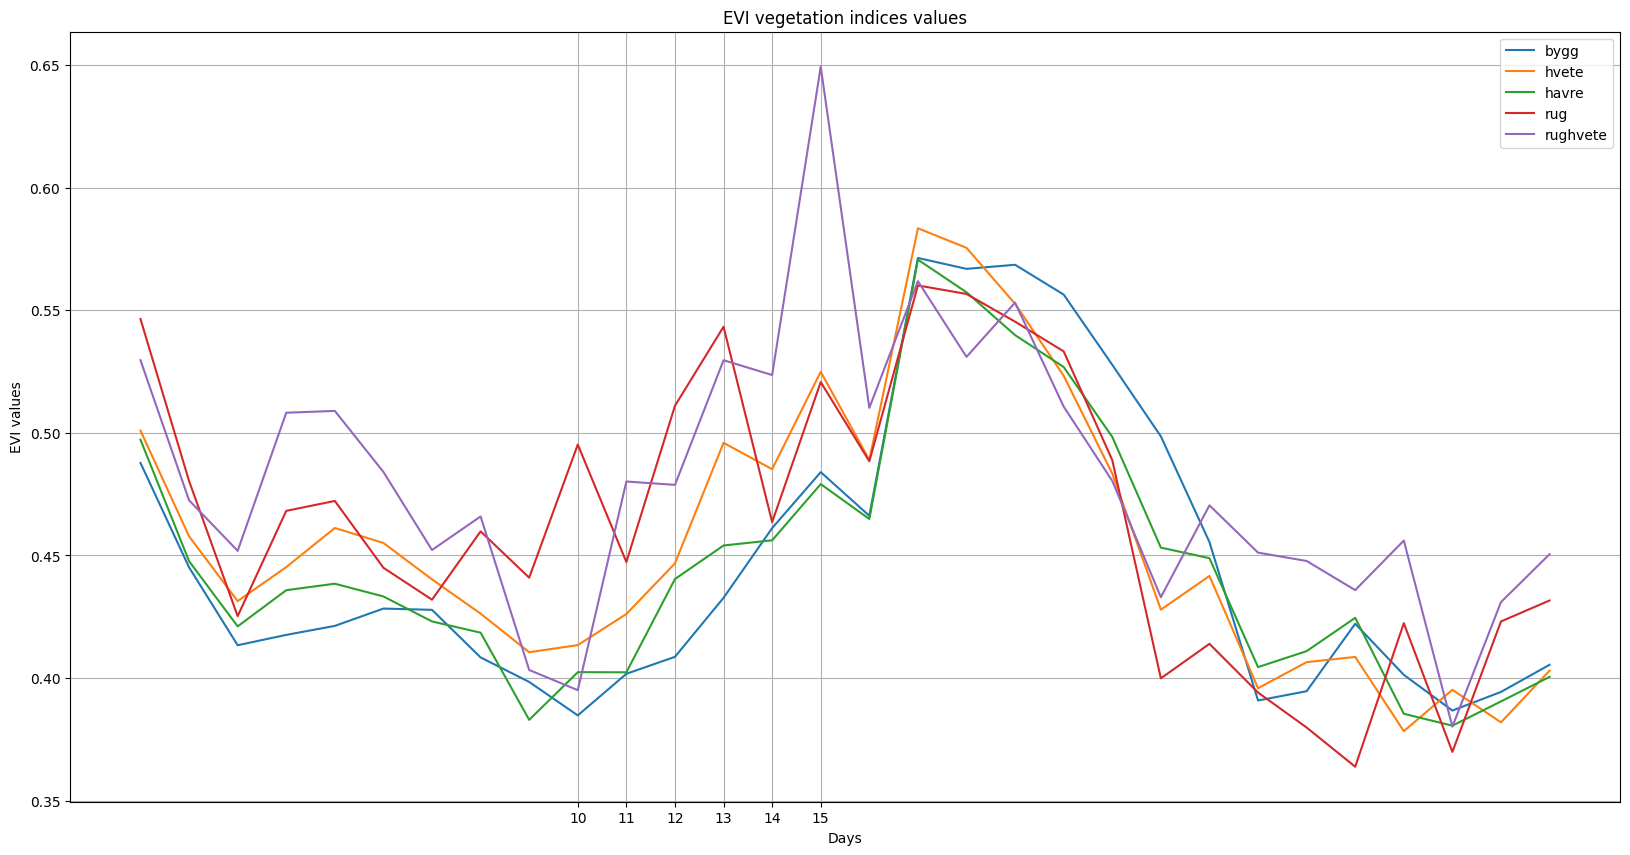

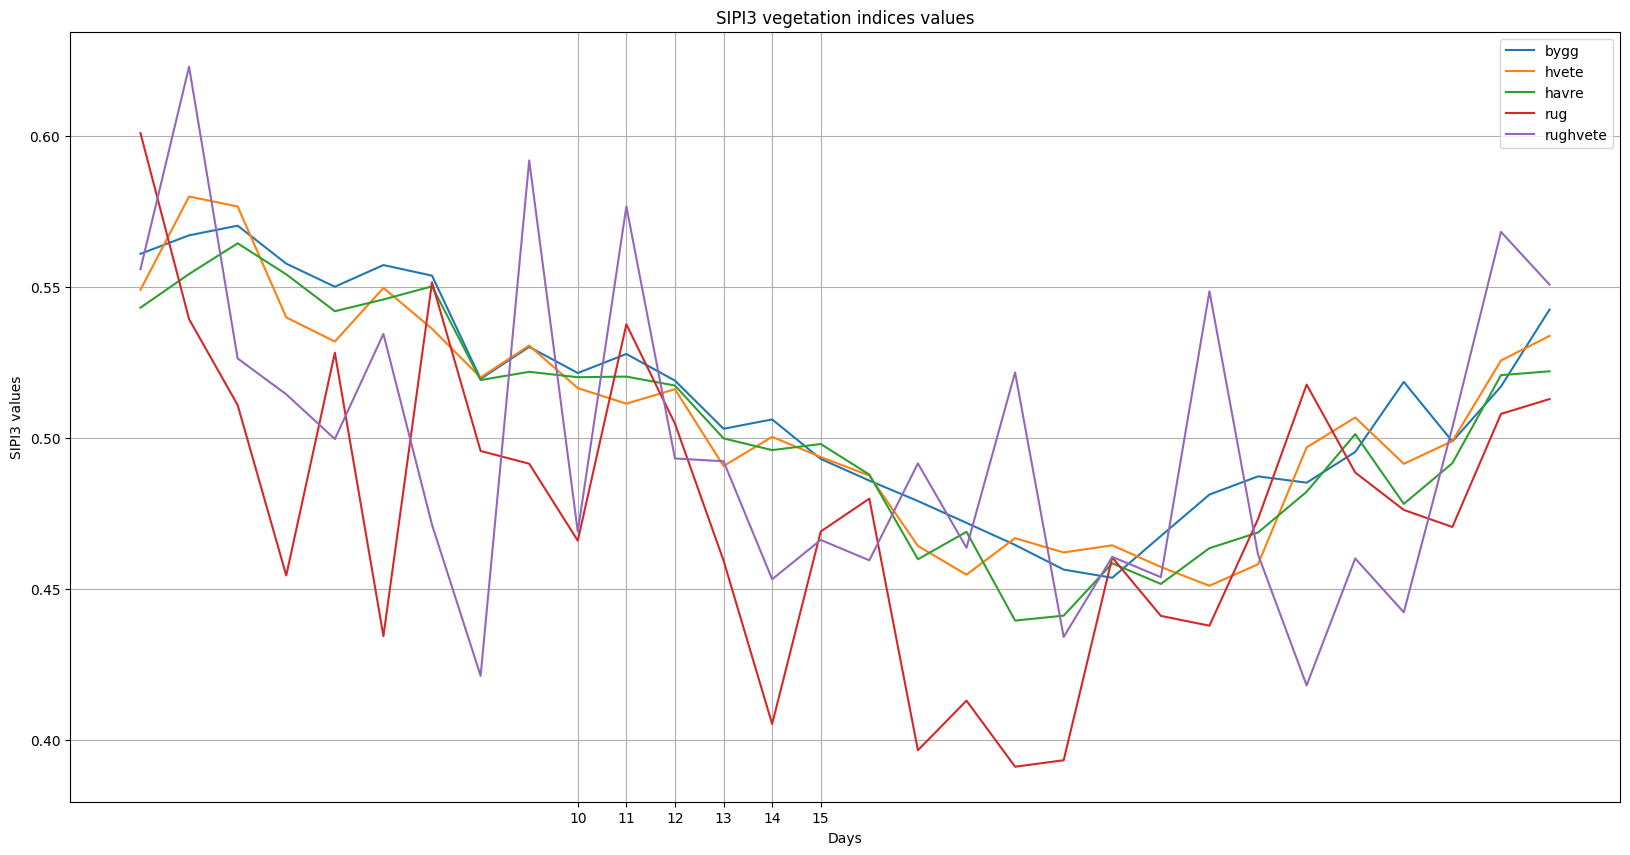

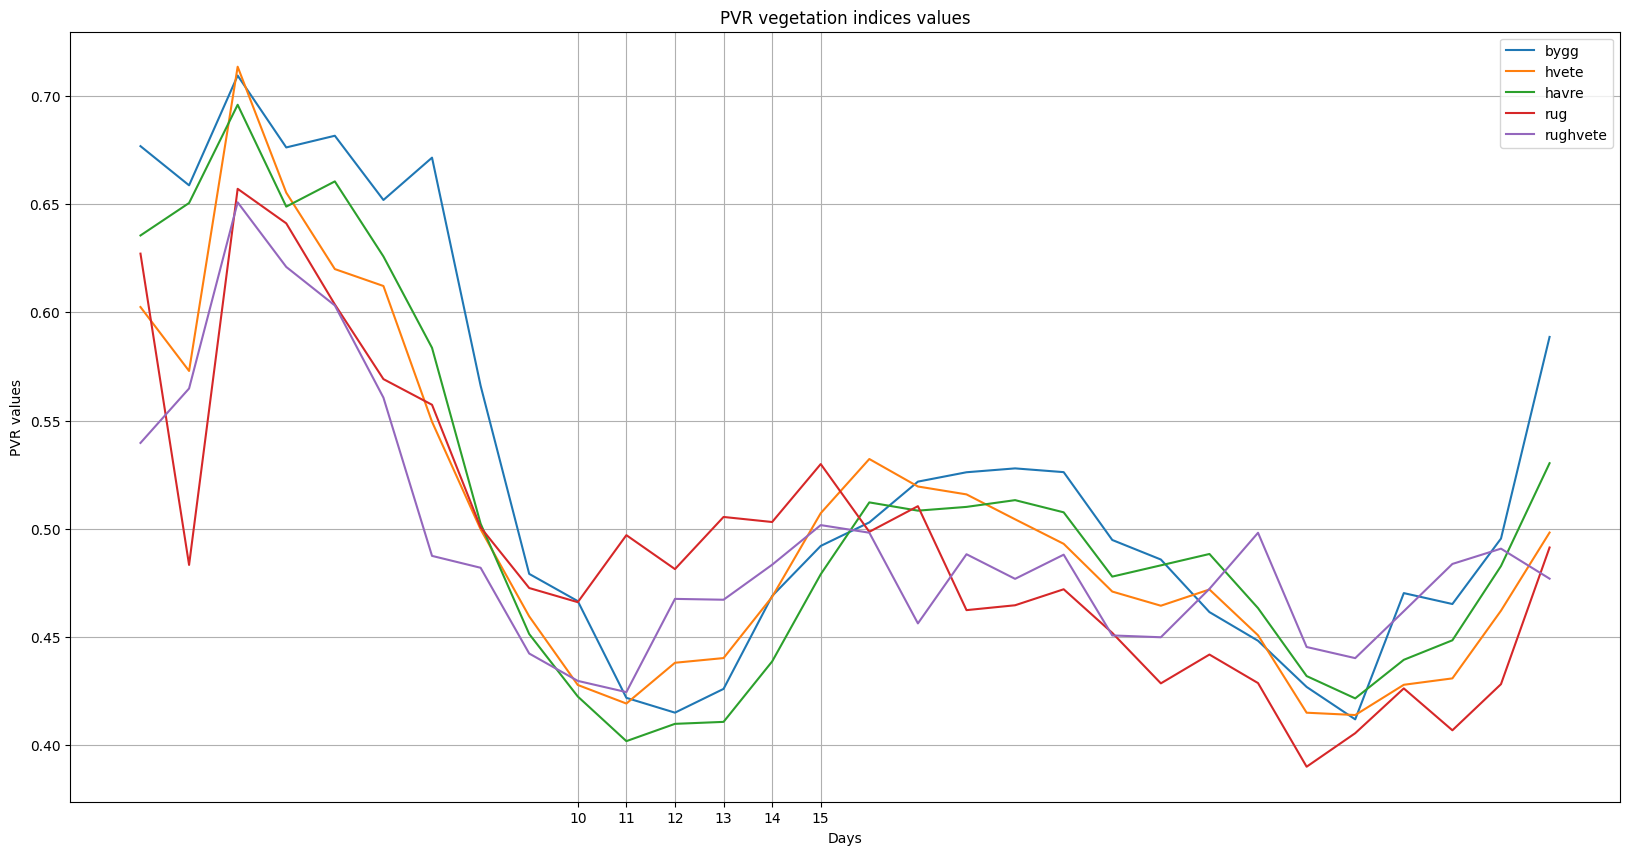

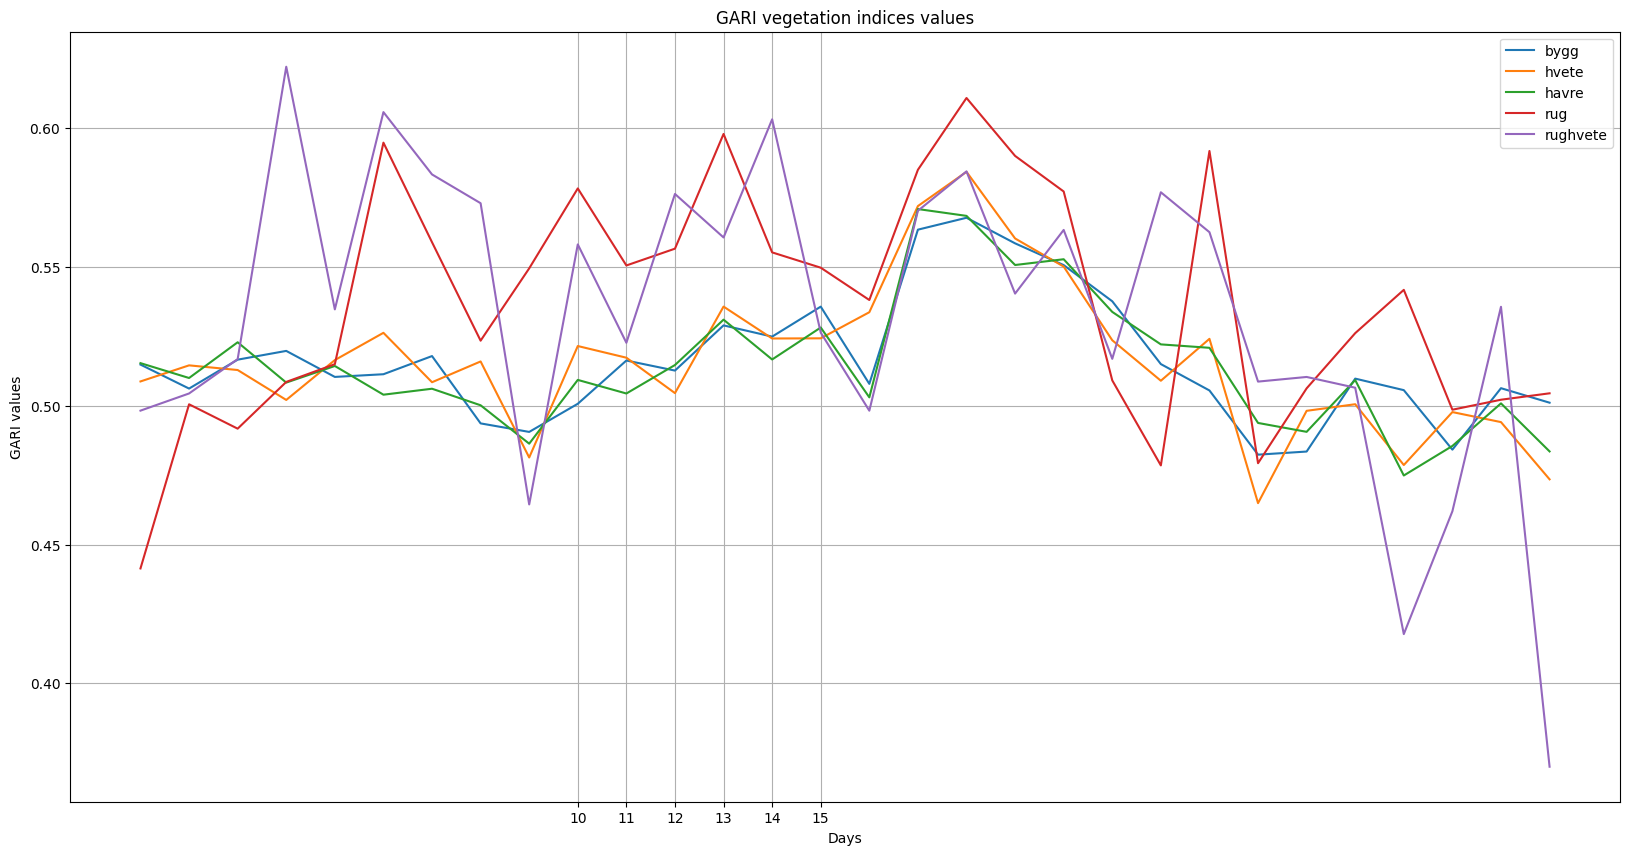

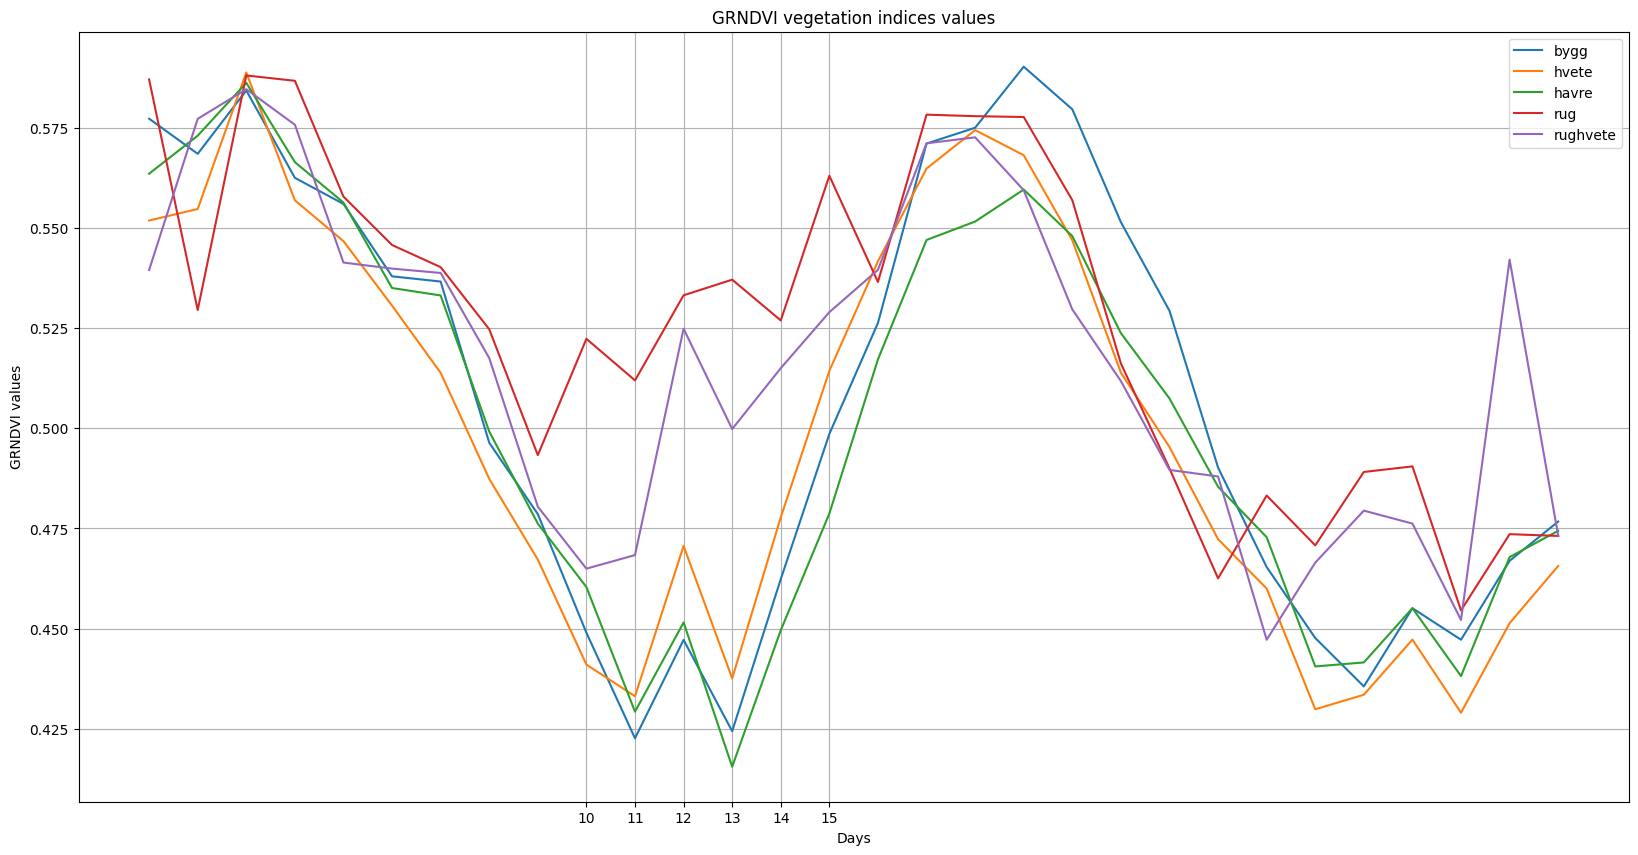

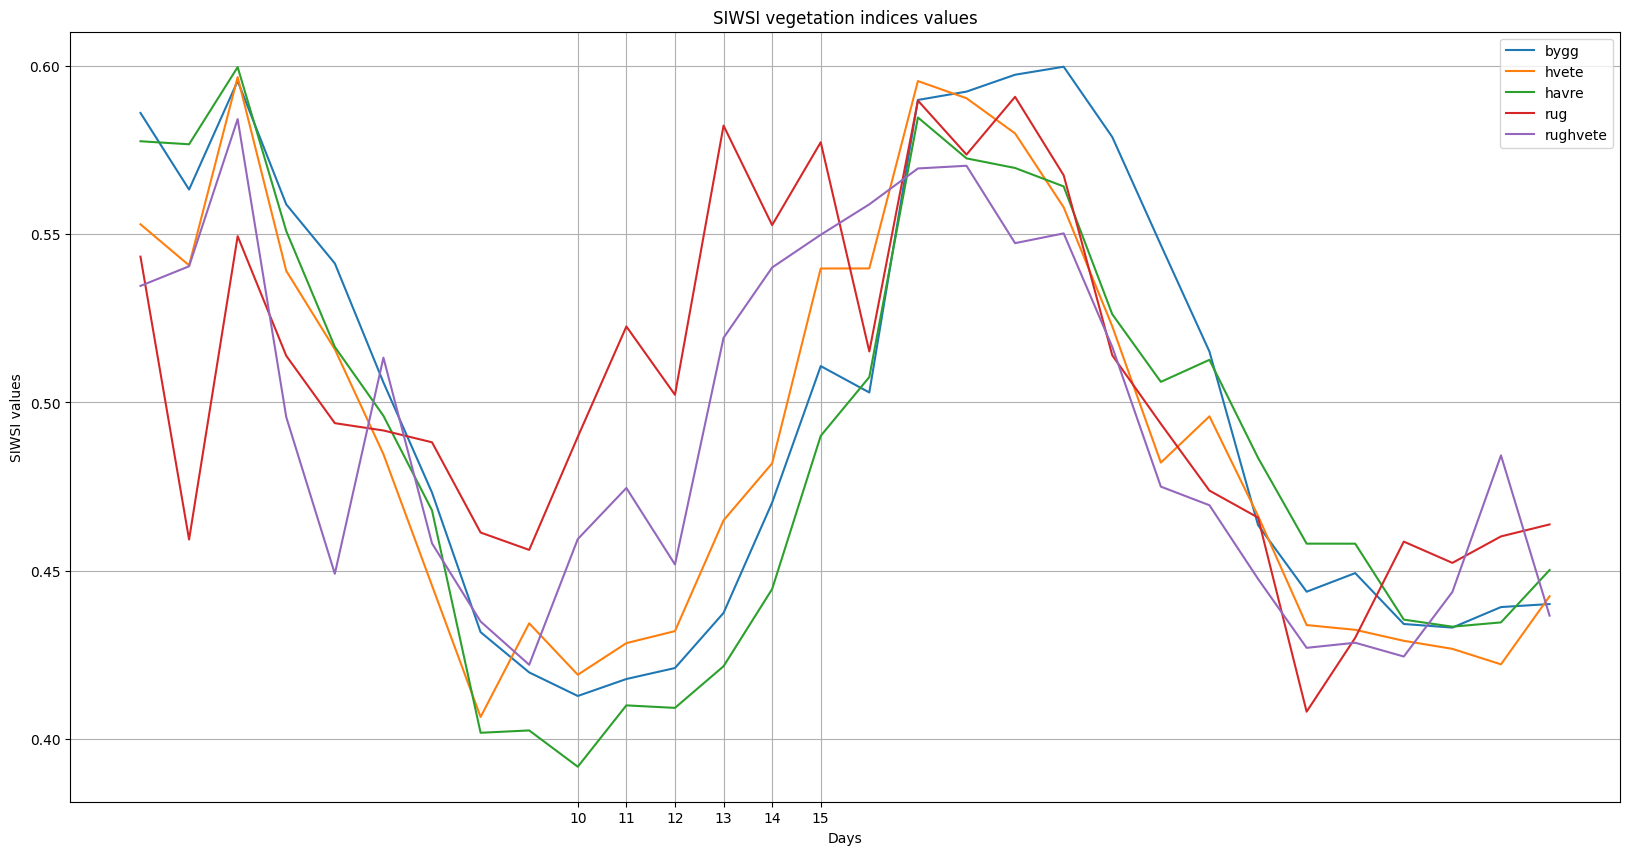

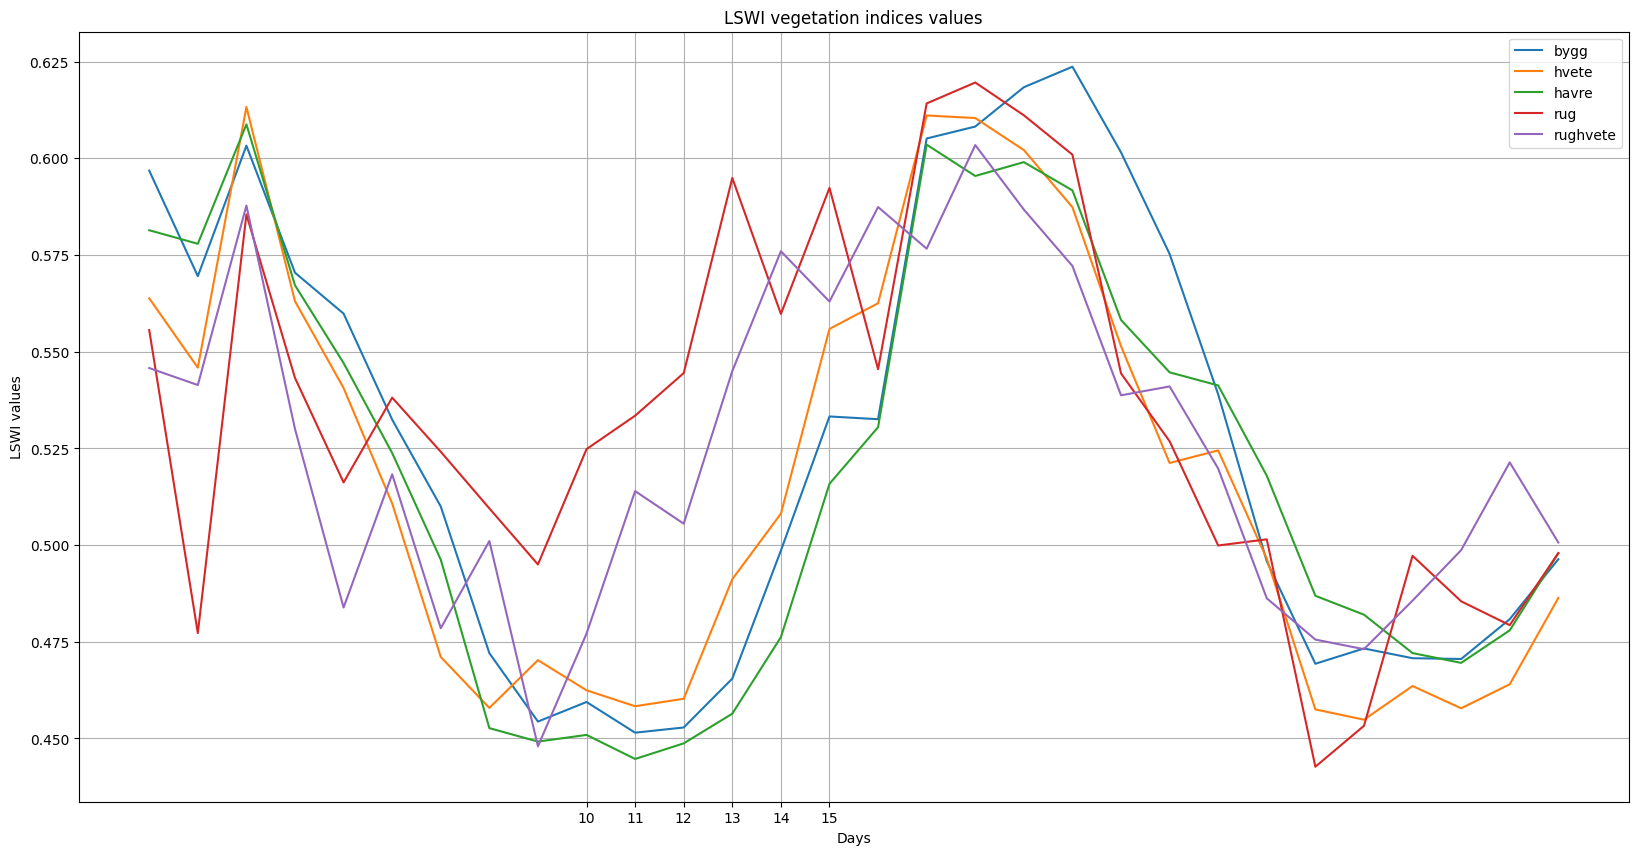

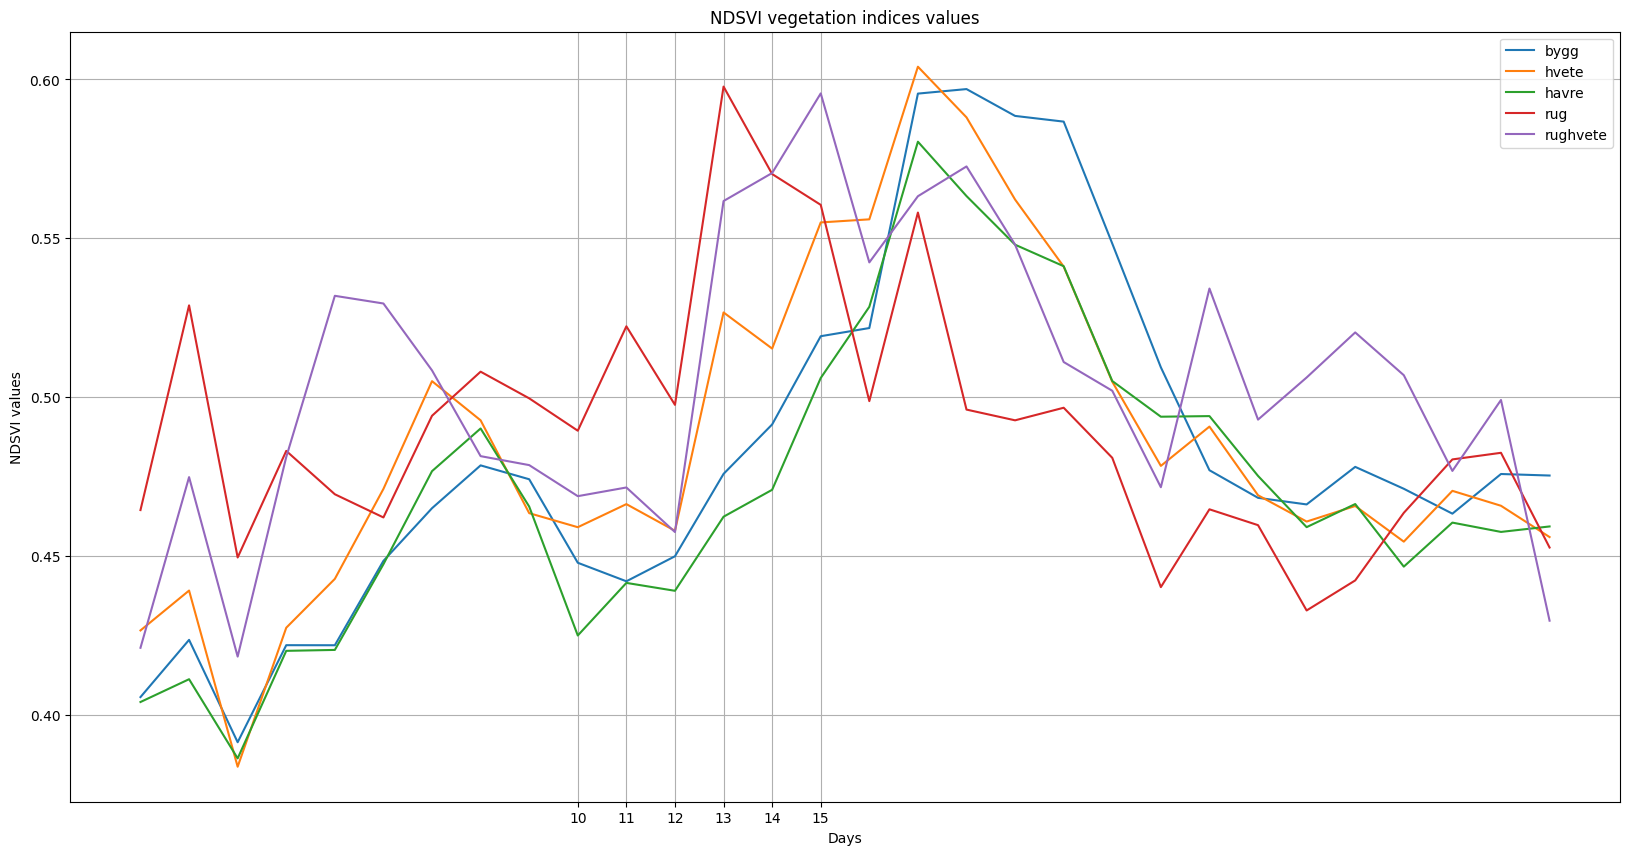

In [12]:

crop_types = ['bygg', 'hvete', 'havre', 'rug', 'rughvete']
vegetation_indices = ["NDVI", "NDRE", "EVI", "SIPI3", "PVR", "GARI", "GRNDVI", "SIWSI", "LSWI", "NDSVI"]


y= []
for i in range(1, 31):
    y.append(i)

for vegetation_index in vegetation_indices:

    for crop_type in crop_types:
        x = final_dataset[(final_dataset['index'] == vegetation_index) & (final_dataset['planted'] == crop_type)].values.flatten().tolist()

        plt.plot(y, x[2:], label=x[1])


    plt.rcParams["figure.figsize"] = (20,10)
    plt.xlabel('Days')
    plt.ylabel(f'{x[0]} values')
    plt.title(f'{x[0]} vegetation indices values')

    # Change how many lines to show
    plt.xticks(np.arange(10, 16, 1))
    plt.grid()
    plt.legend()
    plt.show()